### <center>Zelena Intan Mardita</center>
#### <center>F1D022103</center>

# Here you can put your extraordinary code

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

Script "import matplotlib.pyplot as plt" digunakan untuk mengimport library matplotlib.pyplot yang digunakan untuk membuat plot grafik dan visualisasi data

Script "import numpy as np" digunakan untuk mengimport library Numpy sebagai alat bantu matematika yang sering digunakan dalam pengolahan citra

Script "import cv2 as cv" digunakan untuk mengimport library OpenCV yang digunakan untuk pengolahan citra dan video

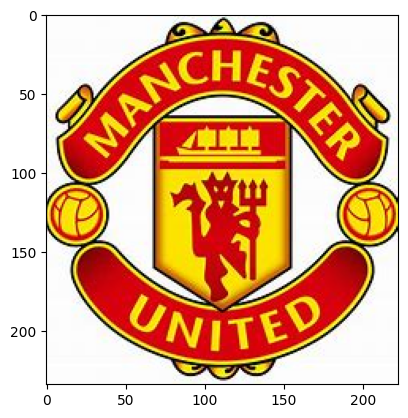

In [16]:
imgMU = plt.imread("../assets/manchester_united.jpeg")
plt.imshow(imgMU)

Script tersebut digunakan untuk membaca citra "assets/manchester_united.jpeg" menggunakan fungsi imread() dari library matplotlib.image dan menampilkannya menggunakan fungsi imshow() dari matplotlib.pyplot.

imread() digunakan untuk membaca citra dari file dan mengembalikan nilai piksel citra dalam bentuk array numpy. 

### Menampilkan Citra Sebelum dan Setelah Gray Scaling

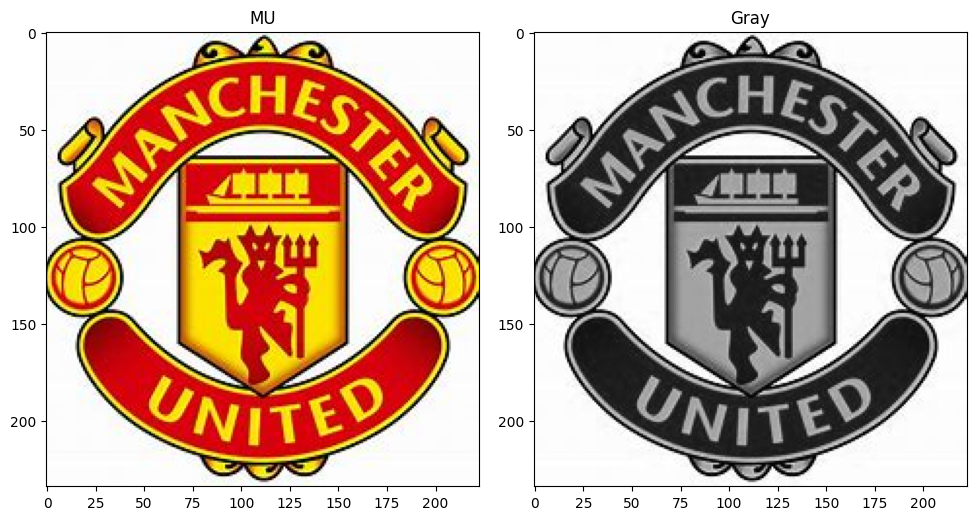

In [17]:
gray = cv.cvtColor(imgMU, cv.COLOR_BGR2GRAY)

plt.figure (figsize = (10, 10))
plt.subplot (221), plt.imshow (imgMU, cmap = 'gray'), plt.title ('MU')
plt.subplot (222), plt.imshow (gray, cmap = 'gray'), plt.title ('Gray')

plt.tight_layout()
plt.show()

Script di atas merupakan sebuah code yang digunakan untuk meng-import citra Manchester United lalu mengubahnya menjadi citra abu dengan fungsi `grayScaling`.

In [20]:
def konvolusi(image, kernel):
    result = np.zeros(image.shape).astype(int)
    imgpad = getPadding(image,kernel)
    for i in range(image.shape[1]):
        for j in range(image.shape[1]):
            sum = 0
            for k in range(kernel.shape[0]):
                for l in range(kernel.shape[1]):
                    sum += imgpad[i+k][j+i] * kernel[k, 1]
                    result[i, j] = sum
            return cv.filter2D(image, -1, kernel)
            return result

In [21]:
def getPadding(image, kernel):
    i = (kernel.shape[1]-1)//2
    j = (kernel.shape[0]-1)//2
    kiri = i
    kanan = (kernel.shape[1]-1)-i
    atas = j
    bawah = (kernel.shape[0]-1)-j

    result = np.pad(image, ((atas, bawah), (kiri, kanan)), 'edge')
    return result

In [19]:
def apply_filter(image, kernel):
    filtered_image = cv.filter2D(image, -1, kernel)
    return filtered_image

def get_mode(arr):
    return np.bincount(arr).argmax()

def apply_mode_filter(image):
    result_image = np.zeros_like(image)

    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            patch = image[i - 1:i + 2, j - 1:j + 2].flatten()

            mode = get_mode(patch)

            result_image[i, j] = mode

    return result_image

image = cv.imread("../assets/manchester_united.jpeg", cv.IMREAD_GRAYSCALE)

mean_kernel = np.ones((3, 3), np.float32) / 9


mean_filtered_image = apply_filter(image, mean_kernel)

median_filtered_image = cv2.medianBlur(image, 3)

mode_filtered_image = apply_mode_filter(image)

cv.imshow('Original Image', image)
cv.imshow('Mean Filtered Image', mean_filtered_image)
cv.imshow('Median Filtered Image', median_filtered_image)
cvimshow('Mode Filtered Image', mode_filtered_image)
cv.waitKey(0)
cv.destroyAllWindows()


NameError: name 'cv2' is not defined